In [1]:
import pandas as pd
from pathlib import Path
from data_tools import df_processing as dfp
from data_tools import graphs as gt

/opt/mmayers/software/anaconda3/envs/ml/lib/python3.6/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
nw_name = '10d_Diseae_Phenotype_Cleanup_deduplication'
nw_dir = Path('../2_pipeline').resolve().joinpath(nw_name, 'out')

owl_name = '10a_Disease_Pheno_Cleanup_parse_owls'
owl_dir = nw_dir.parent.parent.joinpath(owl_name, 'out')
sym_dir = nw_dir.parent.parent.joinpath('10c_Diseae_Phenotype_Cleanup_do_hp_node_merging', 'out')

In [3]:
this_name = '10e_Diseae_Phenotype_Cleanup_adding_edges'
out_dir = Path('../2_pipeline').resolve().joinpath(this_name, 'out')

out_dir.mkdir(parents=True, exist_ok=True)

In [4]:
hp_rel = pd.read_csv(owl_dir.joinpath('HP_edge_info.csv'))
do_rel = pd.read_csv(owl_dir.joinpath('DO_edge_info.csv'))

In [5]:
sym_info = pd.read_csv(owl_dir.joinpath('SYMP_node_info.csv'))
do_info = pd.read_csv(owl_dir.joinpath('DO_node_info.csv'))
hp_info = pd.read_csv(owl_dir.joinpath('HP_node_info.csv'))

In [6]:
sym_hp = pd.read_csv(sym_dir.joinpath('symptom_hpo.csv'))

In [7]:
sym_id = sym_hp['id_sym'].unique()

In [8]:
do_to_hp = do_rel.query('objs in @sym_id').merge(sym_hp, left_on=['objs'], right_on=['id_sym'], how='left')

In [9]:
nodes = pd.read_csv(nw_dir.joinpath('nodes.csv'), dtype=str)
edges = pd.read_csv(nw_dir.joinpath('edges.csv'), dtype=str)

In [10]:
id_to_name = nodes.set_index('id')['name'].to_dict()

In [11]:
do_to_hp['start_name'] = do_to_hp['sbjs'].map(id_to_name)
do_to_hp['end_name'] = do_to_hp['id_hp'].map(id_to_name)

In [12]:
do_to_hp

,sbjs,objs,id_sym,xrefs,id_hp,start_name,end_name
0,DOID:0050059,SYMP:0000570,SYMP:0000570,C0011991,HP:0002014,oropharyngeal anthrax,NaN
1,DOID:0050118,SYMP:0000605,SYMP:0000605,C0009421,HP:0001259,La Crosse encephalitis,Coma
2,DOID:0050120,SYMP:0000521,SYMP:0000521,C0497156,HP:0002716,hemophagocytic lymphohistiocytosis,Lymphadenopathy
3,DOID:0050129,SYMP:0000570,SYMP:0000570,C0011991,HP:0002014,secretory diarrhea,NaN
4,DOID:0050130,SYMP:0000570,SYMP:0000570,C0011991,HP:0002014,osmotic diarrhea,NaN
...,...,...,...,...,...,...,...
136,DOID:9360,SYMP:0000601,SYMP:0000601,C0020578,HP:0002883,intrinsic asthma,Hyperventilation
137,DOID:946,SYMP:0000570,SYMP:0000570,C0011991,HP:0002014,dientamoebiasis,NaN
138,DOID:9537,SYMP:0000570,SYMP:0000570,C0011991,HP:0002014,Lassa fever,NaN
139,DOID:9640,SYMP:0000570,SYMP:0000570,C0011991,HP:0002014,sarcocystosis,NaN


In [13]:
nw_ids = nodes['id'].unique()

In [14]:
len(do_to_hp.query('sbjs in @nw_ids and id_hp in @nw_ids'))

58

In [15]:
sym_ids = do_rel[do_rel['objs'].str.startswith('SYMP:')]['objs'].unique()

In [16]:
do_rel[do_rel['objs'].str.startswith('SYMP:')]

,sbjs,objs
127,DOID:0050059,SYMP:0000570
128,DOID:0050059,SYMP:0019145
134,DOID:0050073,SYMP:0019168
136,DOID:0050073,SYMP:0000041
148,DOID:0050118,SYMP:0000030
...,...,...
6075,DOID:9935,SYMP:0000061
6079,DOID:9957,SYMP:0000061
6081,DOID:9965,SYMP:0000047
6082,DOID:9971,SYMP:0000458


In [17]:
sym_map = sym_info.query('id in @sym_ids')
sym_map = pd.merge(sym_map, nodes[['id', 'name', 'label']], on='name', how='inner', suffixes=('_sym', ''))
sym_map

,id_sym,name,synonyms,xrefs,alt_ids,id,label
0,SYMP:0000008,blindness,NaN,NaN,NaN,DOID:1432,Disease
1,SYMP:0000046,hepatitis,NaN,NaN,NaN,DOID:2237,Disease
2,SYMP:0000051,hydrocephalus,NaN,NaN,NaN,DOID:10908,Disease
3,SYMP:0000061,inflammation,NaN,NaN,NaN,MESH:D007249,Phenotype
4,SYMP:0000086,lymphopenia,NaN,NaN,NaN,DOID:614,Disease
5,SYMP:0000098,nephritis,NaN,NaN,NaN,DOID:10952,Disease
6,SYMP:0000114,thrombocytopenia,NaN,NaN,NaN,DOID:1588,Disease
7,SYMP:0000128,conjunctivitis,NaN,NaN,NaN,DOID:6195,Disease
8,SYMP:0000153,vasculitis,NaN,NaN,NaN,DOID:865,Disease
9,SYMP:0000208,anemia,anaemia,NaN,NaN,DOID:2355,Disease


In [18]:
sym_map['label'].value_counts()

Disease      30
Phenotype     1
Name: label, dtype: int64

In [19]:
sym_map = sym_map.query('label == "Phenotype"')

sym_rels = do_rel[do_rel['objs'].str.startswith('SYMP:')].merge(sym_map, left_on=['objs'], right_on=['id_sym'], how='inner')[['sbjs', 'id']]

In [20]:
edges['source'].value_counts()

CTD                                            5403381
Gene Ontology                                  1159049
WikiData                                        918577
Reactome                                        777209
Gene Ontology|WikiData                          276894
Human Phenotype Ontology                        222882
miRTarBase                                       94641
CTD|Reactome                                     89512
Protein Ontology                                 74353
Inxight Drugs                                    47211
CTD|WikiData                                     41655
Gene Ontology|Reactome|WikiData                  32121
GAUSS                                            29783
ensembl                                          28426
InterPro                                         27019
DrugBank                                          9302
DrugCentral                                       8946
Reactome|WikiData                                 7201
Protein On

In [21]:
edges.query('source == "WikiData"').head(2)

,start_id,end_id,type,dsrc_type,comp_type,p_val,adj_p,source,license,experiments,support_type,pmids,phase,date,name,name_x,name_y
0,UNII:BTY153760O,NCBIGene:3605,Neutralizing antibody,computed,merge,NaN,NaN,WikiData,CC0 1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CHEBI:10055,NCBIGene:153,agonist,computed,merge,NaN,NaN,WikiData,CC0 1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
do_to_hp = do_to_hp.query('id_hp in @nw_ids')[['sbjs', 'id_hp']]
do_to_hp.columns = ['start_id', 'end_id']

In [23]:
sym_rels = sym_rels.rename(columns={'sbjs': 'start_id', 'id': 'end_id'})

sym_rels = pd.concat([sym_rels, do_to_hp])

sym_rels['type'] = 'presents'
sym_rels['dsrc_type'] = 'curated'
sym_rels['source'] = 'Disease Ontology'
sym_rels['license'] = 'CC0 1.0'

In [24]:
sym_dis_ids = sym_rels['start_id'].unique()

missing_dis = set(sym_dis_ids) - set(nw_ids)
add_nodes = do_info.query('id in @missing_dis')
len(missing_dis) == len(add_nodes)

True

In [25]:
nodes_out = pd.concat([nodes, add_nodes], sort=False, ignore_index=True)

In [26]:
len(sym_rels.drop_duplicates())

138

In [27]:
print('New edges added: {}'.format(len(set(sym_rels[['start_id', 'end_id']].apply(tuple, axis=1)) - set(edges.query('type == "presents"')[['start_id', 'end_id']].apply(tuple, axis=1)))))

New edges added: 130


In [28]:
edges_out = dfp.combine_group_cols_on_char(pd.concat([edges, sym_rels], sort=False, ignore_index=True), 
                                           ['start_id', 'end_id', 'type'], sort=True, prog=True)

In [29]:
combo = gt.combine_nodes_and_edges(nodes_out, edges_out)
combo.query('start_label == "Disease" and end_label == "Phenotype"')

,start_id,end_id,type,dsrc_type,comp_type,p_val,adj_p,source,license,experiments,...,pmids,phase,date,name,name_x,name_y,start_name,end_name,start_label,end_label
1253075,DOID:0040093,HP:0002829,presents,computed,punning,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,drug-induced lupus erythematosus,Arthralgia,Disease,Phenotype
1253076,DOID:0040095,HP:0001279,presents,computed,punning,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,autoimmune cardiomyopathy,Syncope,Disease,Phenotype
1253077,DOID:0040095,HP:0001541,presents,computed,punning,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,autoimmune cardiomyopathy,Ascites,Disease,Phenotype
1253078,DOID:0040095,HP:0001649,presents,computed,punning,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,autoimmune cardiomyopathy,Tachycardia,Disease,Phenotype
1253079,DOID:0040095,HP:0001681,presents,computed,punning,NaN,NaN,WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,autoimmune cardiomyopathy,Angina pectoris,Disease,Phenotype
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9263710,DOID:0080053,HP:0004322,presents,computed|curated,IEA,NaN,NaN,Disease Ontology|Human Phenotype Ontology,CC0 1.0|custom cite no-derivatives,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Albright's hereditary osteodystrophy,Short stature,Disease,Phenotype
9263711,DOID:0080560,HP:0001541,presents,computed|curated,IEA,NaN,NaN,Disease Ontology|Human Phenotype Ontology,CC0 1.0|custom cite no-derivatives,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,congenital disorder of glycosylation Ih,Ascites,Disease,Phenotype
9263712,DOID:2749,HP:0002240,presents,computed|curated,IEA,NaN,NaN,Disease Ontology|Human Phenotype Ontology,CC0 1.0|custom cite no-derivatives,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,glycogen storage disease I,Hepatomegaly,Disease,Phenotype
9263713,DOID:3240,HP:0002789,presents,computed|curated,punning,NaN,NaN,Disease Ontology|WikiData,CC0 1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,aspiration pneumonitis,Tachypnea,Disease,Phenotype


## Other DO edges

In [30]:
id_to_name = {**do_info.set_index('id')['name'].to_dict(), **id_to_name}

In [31]:
nw_do_rel = do_rel.query('objs in @nw_ids').copy()
nw_do_rel['obj_curi'] = nw_do_rel['objs'].apply(lambda s: s.split(':')[0]) 
nw_do_rel['sbj_name'] = nw_do_rel['sbjs'].map(id_to_name)
nw_do_rel['obj_name'] = nw_do_rel['objs'].map(id_to_name)

In [32]:
nw_do_rel['obj_curi'].value_counts()

UBERON       1421
CL            479
NCBITaxon     228
HP            122
CHEBI          58
DOID           12
Name: obj_curi, dtype: int64

#### Semantics look up

lets see what avaliable semmantics we have connecting diseases to the various types of other concepts

In [33]:
def find_sems(type1, type2):
    for res in combo.query('start_label == @type1 and end_label == @type2')['type'].unique():
        print(type1, '--', res, '--', type2)
    for res in combo.query('start_label == @type2 and end_label == @type1')['type'].unique():
        print(type2, '--', res, '--', type1)

In [34]:
def find_missing_dis(ids):
    missing_dis = set(ids) - set(nw_ids)
    add_nodes = do_info.query('id in @missing_dis')
    assert len(missing_dis) == len(add_nodes)
    return add_nodes

In [35]:
add_nodes = []
add_edges = []

#### Chemicals

In [36]:
nw_do_rel.query('obj_curi == "CHEBI"').sample(2)

,sbjs,objs,obj_curi,sbj_name,obj_name
19,DOID:0040020,CHEBI:204928,CHEBI,cefotaxime allergy,cefotaxime
73,DOID:0040075,CHEBI:167099,CHEBI,benzo[d]isothiazol-3-one allergic contact derm...,benzo[d]isothiazol-3-one


In [37]:
find_sems('Disease', 'Compound')

Compound -- treats -- Disease
Compound -- Primary -- Disease
Compound -- Palliative -- Disease
Compound -- Diagnostic -- Disease
Compound -- Preventing -- Disease
Compound -- Secondary -- Disease
Compound -- Inactive ingredient -- Disease
Compound -- Preventive -- Disease
Compound -- therapeutic -- Disease
Compound -- marker_or_mechanism -- Disease


Marker or mechanism is the closest (this compound is mechanisitic to this allergy)

In [38]:
chems = nw_do_rel.query('obj_curi == "CHEBI" and objs in @nw_ids').copy()
chems = chems[['sbjs', 'objs']]
chems.columns = ['end_id', 'start_id']

add_nodes.append(find_missing_dis(chems['end_id']))

chems['type'] = 'marker_or_mechanism'
chems['dsrc_type'] = 'curated'
chems['source'] = 'Disease Ontology'
chems['license'] = 'CC0 1.0'

add_edges.append(chems)

#### Anatomy

In [39]:
nw_do_rel.query('obj_curi == "UBERON"').sample(2)

,sbjs,objs,obj_curi,sbj_name,obj_name
686,DOID:0060030,UBERON:0001032,UBERON,"autoimmune disease of eyes, ear, nose and throat",sensory system
84,DOID:0040086,UBERON:0002113,UBERON,Polyomavirus-associated nephropathy,kidney


In [40]:
find_sems('Disease', 'Anatomy')

Anatomy -- site_of -- Disease


In [41]:
anatomy_tups = combo.query('start_label == "Anatomy" and end_label == "Disease"')[['start_id', 'end_id']].apply(tuple, axis=1)

In [42]:
anat = nw_do_rel.query('obj_curi == "UBERON" and objs in @nw_ids').copy()
anat = anat[['sbjs', 'objs']]
anat.columns = ['end_id', 'start_id']

add_nodes.append(find_missing_dis(anat['end_id']))

anat['type'] = 'site_of'
anat['dsrc_type'] = 'curated'
anat['source'] = 'Disease Ontology'
anat['license'] = 'CC0 1.0'

add_edges.append(anat)

In [43]:
new_anat_tups = anat[['start_id', 'end_id']].apply(tuple, axis=1)

print(len(anatomy_tups))
print(len(new_anat_tups))
print(len(set(new_anat_tups) - set(anatomy_tups)))

26454
1421
369


#### CL

In [44]:
nw_do_rel.query('obj_curi == "CL"').sample(2)

,sbjs,objs,obj_curi,sbj_name,obj_name
4976,DOID:467,CL:0000115,CL,venous hemangioma,endothelial cell
5878,DOID:8923,CL:0000148,CL,skin melanoma,melanocyte


In [45]:
find_sems('Disease', 'Cell Type')

NEW EDGE!!!! It's simialr to anatomy, so lets see if there's similar semmnatics in anatomy

In [46]:
find_sems('Disease', 'Anatomy')

Anatomy -- site_of -- Disease


In [47]:
cell = nw_do_rel.query('obj_curi == "CL" and objs in @nw_ids').copy()
cell = cell[['sbjs', 'objs']]
cell.columns = ['end_id', 'start_id']

add_nodes.append(find_missing_dis(cell['end_id']))

cell['type'] = 'site_of'
cell['dsrc_type'] = 'curated'
cell['source'] = 'Disease Ontology'
cell['license'] = 'CC0 1.0'
print(len(cell))

add_edges.append(cell)

479


#### Taxon

In [48]:
nw_do_rel.query('obj_curi == "NCBITaxon"').sample(2)

,sbjs,objs,obj_curi,sbj_name,obj_name
5776,DOID:8478,NCBITaxon:1750,NCBITaxon,actinomycosis,Pseudopropionibacterium propionicum
4897,DOID:4325,NCBITaxon:186540,NCBITaxon,Ebola hemorrhagic fever,Sudan ebolavirus


In [49]:
find_sems('Disease', 'Taxon')

Taxon -- causes -- Disease


In [50]:
tax_tups = combo.query('start_label == "Taxon" and end_label == "Disease"')[['start_id', 'end_id']].apply(tuple, axis=1)
len(tax_tups)

69150

In [51]:
taxa = nw_do_rel.query('obj_curi == "NCBITaxon" and objs in @nw_ids').copy()
taxa = taxa[['sbjs', 'objs']]
taxa.columns = ['end_id', 'start_id']

add_nodes.append(find_missing_dis(taxa['end_id']))

taxa['type'] = 'causes'
taxa['dsrc_type'] = 'curated'
taxa['source'] = 'Disease Ontology'
taxa['license'] = 'CC0 1.0'

add_edges.append(taxa)

In [52]:
new_tax_tups = taxa[['start_id', 'end_id']].apply(tuple, axis=1)

print(len(tax_tups))
print(len(new_tax_tups))
print(len(set(new_tax_tups) - set(tax_tups)))

69150
228
58


## HPO Edges

In [53]:
hp_rel['sbj_curi'] = hp_rel['sbjs'].apply(lambda s: s.split(':')[0]) 
hp_rel['obj_curi'] = hp_rel['objs'].apply(lambda s: s.split(':')[0]) 
hp_rel['sbj_name'] = hp_rel['sbjs'].map(id_to_name)
hp_rel['obj_name'] = hp_rel['objs'].map(id_to_name)

In [54]:
hp_rel['sbj_curi'].value_counts()

HP                      12738
UBERON                  12509
GO                       2768
CHEBI                    1666
CL                       1607
PR                        928
PATO                      184
gene                      106
MGI                       101
NBO                        69
HsapDv                     19
BFO                         4
CP                          2
ZDB-GENE-000210-20          1
ZDB-GENE-980526-110         1
ZDB-GENE-030131-1577        1
ZDB-GENE-980526-501         1
SO                          1
ZDB-GENE-041001-112         1
Name: sbj_curi, dtype: int64

In [55]:
hp_rel['obj_curi'].value_counts()

UBERON                  18561
PATO                     6608
GO                       3351
CHEBI                    1716
NCBITaxon                 722
PR                        707
CL                        408
SO                        185
gene                      106
MGI                       103
NBO                        87
HP                         75
HsapDv                     29
MPATH                      18
MOD                        12
CP                         10
BFO                         4
ZDB-GENE-980526-110         1
ZDB-GENE-030131-1577        1
ZDB-GENE-980526-501         1
ZDB-GENE-000210-20          1
ZDB-GENE-041001-112         1
Name: obj_curi, dtype: int64

In [56]:
nw_hp_rel = hp_rel.query('sbjs in @nw_ids and objs in @nw_ids').copy()
combo_type = nw_hp_rel[['sbj_curi', 'obj_curi']].apply(tuple, axis=1)
combo_type.value_counts()

(UBERON, UBERON)    3432
(GO, GO)            2762
(HP, UBERON)        1736
(CL, PR)             569
(CL, UBERON)         374
(CHEBI, CHEBI)       318
(CL, GO)             275
(CL, CL)             147
(HP, GO)             120
(HP, CL)              59
(HP, HP)              29
(HP, CHEBI)            5
dtype: int64

In [57]:
def combo_query(this_combo):
    idx = combo_type[combo_type == this_combo].index
    return nw_hp_rel.loc[idx]

In [58]:
combo_query(('GO', 'GO'))

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
3491,GO:0000018,GO:0006310,GO,GO,regulation of DNA recombination,DNA recombination
3492,GO:0000018,GO:0006310,GO,GO,regulation of DNA recombination,DNA recombination
3493,GO:0000070,GO:0140014,GO,GO,mitotic sister chromatid segregation,mitotic nuclear division
3494,GO:0000070,GO:0140014,GO,GO,mitotic sister chromatid segregation,mitotic nuclear division
3495,GO:0000228,GO:0031981,GO,GO,nuclear chromosome,nuclear lumen
...,...,...,...,...,...,...
6254,GO:2001224,GO:0001764,GO,GO,positive regulation of neuron migration,neuron migration
6255,GO:2001251,GO:0051276,GO,GO,negative regulation of chromosome organization,chromosome organization
6256,GO:2001251,GO:0051276,GO,GO,negative regulation of chromosome organization,chromosome organization
6257,GO:2001252,GO:0051276,GO,GO,positive regulation of chromosome organization,chromosome organization


Useles regulation info that should already be in the network

In [59]:
combo_query(('UBERON', 'UBERON')).drop_duplicates()

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
20198,UBERON:0000002,UBERON:0000995,UBERON,UBERON,cervix,uterus
20200,UBERON:0000002,UBERON:0000996,UBERON,UBERON,cervix,vagina
20208,UBERON:0000004,UBERON:0001456,UBERON,UBERON,human nose,face
20209,UBERON:0000004,UBERON:0003050,UBERON,UBERON,human nose,olfactory placode
20211,UBERON:0000004,UBERON:0001004,UBERON,UBERON,human nose,respiratory system
...,...,...,...,...,...,...
32352,UBERON:0036212,UBERON:0016467,UBERON,UBERON,Incisura anterior auris,Antitragus
32354,UBERON:0036212,UBERON:0001757,UBERON,UBERON,Incisura anterior auris,auricle
32483,UBERON:1000021,UBERON:0001456,UBERON,UBERON,skin of face,face
32520,UBERON:4200172,UBERON:0004411,UBERON,UBERON,anatomical neck of humerus,upper extremity of humerus


Part of relationships... might be worth it, but we don't have in the network currently...

In [60]:
idx=2
this_combo = combo_type.value_counts().index.tolist()[idx]
combo_query(this_combo).drop_duplicates()

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
6265,HP:0000013,UBERON:0000995,HP,UBERON,Hypoplasia of the uterus,uterus
6272,HP:0000021,UBERON:0001556,HP,UBERON,Megacystis,lower urinary tract
6282,HP:0000026,UBERON:0000473,HP,UBERON,Male hypogonadism,testicle
6296,HP:0000034,UBERON:0006314,HP,UBERON,Hydrocele testis,body fluid
6298,HP:0000034,UBERON:0000473,HP,UBERON,Hydrocele testis,testicle
...,...,...,...,...,...,...
18346,HP:0410075,UBERON:0001359,HP,UBERON,Increased level of xylitol in CSF,cerebrospinal fluid
18365,HP:0410170,UBERON:0002421,HP,UBERON,Hippocampal atrophy,hippocampal formation
18369,HP:0410175,UBERON:0000178,HP,UBERON,Hyperketonemia,blood
18659,HP:0500167,UBERON:0000178,HP,UBERON,Hypergastrinemia,blood


I think phenotype anatomy is new, and not a bad idea

In [61]:
find_sems('Phenotype', 'Anatomy')

Phenotype -- localized_to -- Anatomy
Anatomy -- site_of -- Phenotype


In [62]:
pheno_anat = combo_query(this_combo).drop_duplicates()
pa_tups = set(combo.query('start_label == "Anatomy" and end_label == "Phenotype"')[['start_id', 'end_id']].apply(tuple, axis=1))
pa_tups = pa_tups | set(combo.query('start_label == "Phenotype" and end_label == "Anatomy"')[['end_id', 'start_id']].apply(tuple, axis=1))

In [63]:
len(pa_tups)

128

In [64]:
pheno_anat = pheno_anat[['sbjs', 'objs']]
pheno_anat.columns = ['end_id', 'start_id']

pheno_anat['type'] = 'site_of'
pheno_anat['dsrc_type'] = 'curated'
pheno_anat['source'] = 'Disease Ontology'
pheno_anat['license'] = 'CC0 1.0'

add_edges.append(pheno_anat)

In [65]:
new_pa_tups = pheno_anat[['start_id', 'end_id']].apply(tuple, axis=1)

print(len(pa_tups))
print(len(new_pa_tups))
print(len(set(new_pa_tups) - set(pa_tups)))

128
1726
1713


1200 new edges ain't bad!!

In [66]:
idx=3
this_combo = combo_type.value_counts().index.tolist()[idx]
combo_query(this_combo).drop_duplicates()

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
1905,CL:0000037,PR:000001002,CL,PR,hematopoietic stem cell,CD19 molecule
1906,CL:0000037,PR:000001020,CL,PR,hematopoietic stem cell,CD3 epsilon
1907,CL:0000037,PR:000001083,CL,PR,hematopoietic stem cell,CD2 molecule
1908,CL:0000037,PR:000001839,CL,PR,hematopoietic stem cell,T-cell surface glycoprotein CD5
1911,CL:0000037,PR:000001889,CL,PR,hematopoietic stem cell,CD14 molecule
...,...,...,...,...,...,...
3176,CL:0002434,PR:000001932,CL,PR,"CD24-positive, CD8 single-positive thymocyte",signal transducer CD24
3179,CL:0002435,PR:000001343,CL,PR,"CD69-positive, CD8-positive single-positive th...",CD69 molecule
3183,CL:0002436,PR:000001932,CL,PR,mature CD4 single-positive thymocyte,signal transducer CD24
3186,CL:0002437,PR:000001932,CL,PR,mature CD8 single-positive thymocyte,signal transducer CD24


In [67]:
find_sems('Cell Type', 'Anatomy')
ca_tups = set(combo.query('start_label == "Cell Type" and end_label == "Anatomy"')[['start_id', 'end_id']].apply(tuple, axis=1))
ca_tups = ca_tups | set(combo.query('start_label == "Anatomy" and end_label == "Cell Type"')[['end_id', 'start_id']].apply(tuple, axis=1))

Cell Type -- part_of -- Anatomy
Cell Type -- is_a -- Anatomy
Cell Type -- produces -- Anatomy
Cell Type -- adjacent_to -- Anatomy
Cell Type -- located_in -- Anatomy
Cell Type -- axon_synapses_in -- Anatomy
Cell Type -- has_synaptic_terminal_in -- Anatomy
Cell Type -- has_soma_location -- Anatomy
Cell Type -- innervates -- Anatomy
Anatomy -- has_part -- Cell Type
Anatomy -- surrounds -- Cell Type
Anatomy -- composed_primarily_of -- Cell Type
Anatomy -- bounding_layer_of -- Cell Type
Anatomy -- part_of -- Cell Type
Anatomy -- produced_by -- Cell Type
Anatomy -- channel_for -- Cell Type
Anatomy -- develops_from -- Cell Type
Anatomy -- adjacent_to -- Cell Type
Anatomy -- extends_fibers_into -- Cell Type
Anatomy -- has_potential_to_developmentally_contribute_to -- Cell Type
Anatomy -- synapsed_by -- Cell Type


In [68]:
len(ca_tups)

1218

In [69]:
cell_anat = combo_query(this_combo).drop_duplicates()

cell_anat = cell_anat[['sbjs', 'objs']]
cell_anat.columns = ['start_id', 'end_id']

cell_anat['type'] = 'part_of'
cell_anat['dsrc_type'] = 'curated'
cell_anat['source'] = 'Disease Ontology'
cell_anat['license'] = 'CC0 1.0'

add_edges.append(cell_anat)

In [70]:
new_ca_tups = cell_anat[['start_id', 'end_id']].apply(tuple, axis=1)

print(len(ca_tups))
print(len(new_ca_tups))
print(len(set(new_ca_tups) - set(ca_tups)))

1218
569
569


Nothing new...

In [71]:
idx=4
this_combo = combo_type.value_counts().index.tolist()[idx]
combo_query(this_combo).drop_duplicates()

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
1927,CL:0000047,UBERON:0001017,CL,UBERON,neuronal stem cell,central nervous system
1937,CL:0000066,UBERON:0000483,CL,UBERON,epithelial cell,epithelium
1939,CL:0000068,UBERON:0000058,CL,UBERON,duct epithelial cell,duct
1940,CL:0000071,UBERON:0004638,CL,UBERON,blood vessel endothelial cell,vascular endothelium
1943,CL:0000080,UBERON:0000179,CL,UBERON,circulating cell,haemolymphatic fluid
...,...,...,...,...,...,...
3483,CL:2000079,UBERON:0000981,CL,UBERON,mesenchymal stem cell of femoral bone marrow,femur
3484,CL:2000080,UBERON:0000916,CL,UBERON,mesenchymal stem cell of abdominal adipose,abdomen
3485,CL:2000085,UBERON:0002331,CL,UBERON,mononuclear cell of umbilical cord,umbilical cord
3486,CL:2000093,UBERON:0002185,CL,UBERON,bronchus fibroblast of lung,bronchus


In [72]:
## Long compute time for this cell... so skip it since we know the result was 51 new edges...

# all_et = set(edges[['start_id', 'end_id']].apply(tuple, axis=1))
# all_et = all_et | set(edges[['end_id', 'start_id']].apply(tuple, axis=1))

# len(set(combo_query(this_combo).drop_duplicates()[['sbjs', 'objs']].apply(tuple, axis=1)) - all_et)

In the interest of thoroughness, we'll pick up these 51...

In [73]:
id_to_label = nodes.set_index('id')['label'].to_dict()

In [74]:
cl_go = combo_query(this_combo).drop_duplicates()

In [75]:
cl_go['go_type'] = cl_go['objs'].map(id_to_label)

In [76]:
cl_go['go_type'].value_counts()

Anatomy    346
Name: go_type, dtype: int64

In [77]:
find_sems('Cell Type', 'Biological Process')

Cell Type -- capable_of -- Biological Process
Cell Type -- participates_in -- Biological Process
Cell Type -- has_not_completed -- Biological Process
Cell Type -- has_completed -- Biological Process
Cell Type -- capable_of_part_of -- Biological Process
Cell Type -- positively_regulates -- Biological Process
Cell Type -- regulates -- Biological Process
Cell Type -- negatively_regulates -- Biological Process
Biological Process -- results_in_acquisition_of_features_of -- Cell Type
Biological Process -- occurs_in -- Cell Type
Biological Process -- acts_on_population_of -- Cell Type
Biological Process -- results_in_determination_of -- Cell Type
Biological Process -- results_in_development_of -- Cell Type
Biological Process -- has_input -- Cell Type
Biological Process -- results_in_commitment_to -- Cell Type
Biological Process -- results_in_movement_of -- Cell Type
Biological Process -- has_participant -- Cell Type
Biological Process -- results_in_specification_of -- Cell Type
Biological Pro

In [78]:
find_sems('Cell Type', 'Cellular Component')

Cell Type -- is_a -- Cellular Component
Cell Type -- has_part -- Cellular Component
Cell Type -- has_plasma_membrane_part -- Cellular Component
Cell Type -- lacks_plasma_membrane_part -- Cellular Component
Cell Type -- lacks_part -- Cellular Component
Cell Type -- has_high_plasma_membrane_amount -- Cellular Component
Cell Type -- has_low_plasma_membrane_amount -- Cellular Component
Cell Type -- produces -- Cellular Component
Cellular Component -- is_a -- Cell Type
Cellular Component -- part_of -- Cell Type
Cellular Component -- overlaps -- Cell Type


In [79]:
cl_go = cl_go[['sbjs', 'objs', 'go_type']]
cl_go.columns = ['start_id', 'end_id', 'type']

cl_go['type'] = cl_go['type'].map({'Cellular Component': 'has_part', 'Biological Process': 'capable_of'})
cl_go['dsrc_type'] = 'curated'
cl_go['source'] = 'Disease Ontology'
cl_go['license'] = 'CC0 1.0'

add_edges.append(cl_go)

In [80]:
idx=5
this_combo = combo_type.value_counts().index.tolist()[idx]
combo_query(this_combo).drop_duplicates()

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
217,CHEBI:11596,CHEBI:36149,CHEBI,CHEBI,2-hydroxyglutarate(2-),2-hydroxyglutarate(1-)
220,CHEBI:11955,CHEBI:16080,CHEBI,CHEBI,4-amino-3-hydroxybutanoate,gamma-amino-beta-hydroxybutyric acid
255,CHEBI:13941,CHEBI:28616,CHEBI,CHEBI,carbamate,carbamic acid
265,CHEBI:14321,CHEBI:29987,CHEBI,CHEBI,glutamate(1-),glutamate(2-)
274,CHEBI:15356,CHEBI:32456,CHEBI,CHEBI,cysteine,cysteinate(1-)
...,...,...,...,...,...,...
1870,CHEBI:84690,CHEBI:28842,CHEBI,CHEBI,alpha-D-Gal-(1->4)-beta-D-Gal-(1->4)-beta-D-Gl...,octadecanoic acid
1871,CHEBI:84981,CHEBI:37024,CHEBI,CHEBI,2-aminoadipate(2-),2-aminoadipic acid
1873,CHEBI:86508,CHEBI:35621,CHEBI,CHEBI,alpha-aminobutyrate,alpha-aminobutyric acid
1880,CHEBI:91316,CHEBI:91317,CHEBI,CHEBI,(S)-methylsuccinic acid,(R)-methylsuccinic acid


In [81]:
idx=6
this_combo = combo_type.value_counts().index.tolist()[idx]
combo_query(this_combo).drop_duplicates()

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
1884,CL:0000014,GO:0017145,CL,GO,germ line stem cell,stem cell division
1885,CL:0000015,GO:0007283,CL,GO,male germ cell,spermatogenesis
1887,CL:0000017,GO:0048137,CL,GO,spermatocyte,spermatocyte division
1888,CL:0000018,GO:0007289,CL,GO,spermatid,spermatid nucleus differentiation
1889,CL:0000018,GO:0007288,CL,GO,spermatid,sperm axoneme assembly
...,...,...,...,...,...,...
3253,CL:0005012,GO:0005929,CL,GO,multi-ciliated epithelial cell,cilium
3263,CL:0008002,GO:0030017,CL,GO,skeletal muscle fiber,sarcomere
3269,CL:0008028,GO:0007601,CL,GO,visual system neuron,visual perception
3293,CL:0011115,GO:0030154,CL,GO,precursor cell,cell differentiation


In [82]:
idx=7
this_combo = combo_type.value_counts().index.tolist()[idx]
hp_go = combo_query(this_combo).drop_duplicates()
hp_go

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
1886,CL:0000017,CL:0000020,CL,CL,spermatocyte,spermatogonium
1892,CL:0000018,CL:0000657,CL,CL,spermatid,secondary spermatocyte
1893,CL:0000019,CL:0000018,CL,CL,sperm,spermatid
1898,CL:0000030,CL:0000133,CL,CL,glioblast,neurectodermal cell
1903,CL:0000037,CL:0000566,CL,CL,hematopoietic stem cell,angioblastic mesenchymal cell
...,...,...,...,...,...,...
3180,CL:0002435,CL:0002430,CL,CL,"CD69-positive, CD8-positive single-positive th...","CD4-intermediate, CD8-positive double-positive..."
3181,CL:0002436,CL:0002432,CL,CL,mature CD4 single-positive thymocyte,"CD24-positive, CD4 single-positive thymocyte"
3184,CL:0002437,CL:0002434,CL,CL,mature CD8 single-positive thymocyte,"CD24-positive, CD8 single-positive thymocyte"
3256,CL:0007004,CL:0000133,CL,CL,premigratory neural crest cell,neurectodermal cell


In [83]:
hp_go['go_type'] = hp_go['objs'].map(id_to_label)
hp_go['go_type'].value_counts()

Cell Type    147
Name: go_type, dtype: int64

In [84]:
find_sems('Biological Process', 'Phenotype')

Biological Process -- associated_with -- Phenotype


In [85]:
find_sems('Cellular Component', 'Phenotype')

Cellular Component -- associated_with -- Phenotype


In [86]:
find_sems('Molecular Function', 'Phenotype')

Molecular Function -- associated_with -- Phenotype


In [87]:
gos = ['Biological Process', 'Cellular Component', 'Molecular Function']

hg_tups = set(combo.query('start_label in @gos and end_label == "Phenotype"')[['start_id', 'end_id']].apply(tuple, axis=1))

In [88]:
hp_go = hp_go[['sbjs', 'objs']].copy()
hp_go.columns = ['end_id', 'start_id']

hp_go['type'] = 'associated_with'
hp_go['dsrc_type'] = 'curated'
hp_go['source'] = 'Disease Ontology'
hp_go['license'] = 'CC0 1.0'

add_edges.append(hp_go)

In [89]:
new_hg_tups = hp_go[['start_id', 'end_id']].apply(tuple, axis=1)

print(len(hg_tups))
print(len(new_hg_tups))
print(len(set(new_hg_tups) - set(hg_tups)))

546483
147
147


In [90]:
idx=8
this_combo = combo_type.value_counts().index.tolist()[idx]
hp_cl = combo_query(this_combo).drop_duplicates()
hp_cl

,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
6398,HP:0000103,GO:0060073,HP,GO,Polyuria,urination
6697,HP:0000364,GO:0007605,HP,GO,Hearing abnormality,sensory perception of sound
6700,HP:0000365,GO:0007605,HP,GO,Hearing impairment,sensory perception of sound
6734,HP:0000403,GO:0006954,HP,GO,Recurrent otitis media,inflammatory response
6736,HP:0000405,GO:0055127,HP,GO,Conductive hearing impairment,vibrational conductance of sound to the inner ear
...,...,...,...,...,...,...
16298,HP:0030897,GO:0120054,HP,GO,Decreased intestinal transit time,intestinal motility
16599,HP:0040012,GO:0031052,HP,GO,Chromosome breakage,chromosome breakage
17848,HP:0100543,GO:0050890,HP,GO,Cognitive impairment,cognition
17974,HP:0100738,GO:0042755,HP,GO,Abnormal eating behavior,eating behavior


In [91]:
find_sems('Cell Type', 'Phenotype')

New Edge Type!!!

In [92]:
hp_cl = hp_cl[['sbjs', 'objs']].copy()
hp_cl.columns = ['end_id', 'start_id']

hp_cl['type'] = 'associated_with' # Weakest semmanitc property
hp_cl['dsrc_type'] = 'curated'
hp_cl['source'] = 'Disease Ontology'
hp_cl['license'] = 'CC0 1.0'

add_edges.append(hp_cl)

In [93]:
idx=9
this_combo = combo_type.value_counts().index.tolist()[idx]
combo_query(this_combo).drop_duplicates()


,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
7927,HP:0001877,CL:0000232,HP,CL,Abnormal erythrocyte morphology,erythrocyte
7948,HP:0001896,CL:0000558,HP,CL,Reticulocytopenia,reticulocyte
7957,HP:0001902,CL:0000233,HP,CL,Giant platelets,platelet
7971,HP:0001922,CL:0000542,HP,CL,Vacuolated lymphocytes,lymphocyte
7972,HP:0001923,CL:0000558,HP,CL,Reticulocytosis,reticulocyte
8246,HP:0002282,CL:0002319,HP,CL,Gray matter heterotopia,neural cell
8308,HP:0002398,CL:0000100,HP,CL,Degeneration of anterior horn cells,motor neuron
8321,HP:0002446,CL:0000127,HP,CL,Astrocytosis,astrocyte
8324,HP:0002450,CL:0000100,HP,CL,Abnormal motor neuron morphology,motor neuron
8607,HP:0002843,CL:0000084,HP,CL,Abnormal T cell morphology,T cell


In [94]:
idx=10
this_combo = combo_type.value_counts().index.tolist()[idx]
combo_query(this_combo).drop_duplicates()


,sbjs,objs,sbj_curi,obj_curi,sbj_name,obj_name
7061,HP:0000740,HP:0000739,HP,HP,Episodic paroxysmal anxiety,Anxiety
7341,HP:0001017,HP:0000980,HP,HP,Anemic pallor,Pallor
7587,HP:0001459,HP:0004691,HP,HP,1-3 toe syndactyly,2-3 toe syndactyly
7650,HP:0001548,HP:0000098,HP,HP,Overgrowth,Tall stature
7651,HP:0001548,HP:0000256,HP,HP,Overgrowth,Macrocephaly
7815,HP:0001782,HP:0001831,HP,HP,Bulbous tips of toes,Short toe
7816,HP:0001782,HP:0009880,HP,HP,Bulbous tips of toes,Broad distal phalanges of all fingers
7818,HP:0001782,HP:0009778,HP,HP,Bulbous tips of toes,Short thumb
8248,HP:0002283,HP:0002506,HP,HP,Global brain atrophy,Diffuse cerebral atrophy
8250,HP:0002283,HP:0100275,HP,HP,Global brain atrophy,Diffuse cerebellar atrophy


In [95]:
find_sems('Compound', 'Phenotype')

Compound -- treats -- Phenotype
Compound -- Primary -- Phenotype
Compound -- Palliative -- Phenotype
Compound -- Inactive ingredient -- Phenotype
Compound -- Diagnostic -- Phenotype
Compound -- Preventing -- Phenotype
Compound -- Secondary -- Phenotype
Compound -- marker_or_mechanism -- Phenotype
Compound -- therapeutic -- Phenotype


In [96]:
#set(combo_query(this_combo).drop_duplicates()[['sbjs', 'objs']].apply(tuple, axis=1)) - all_et

### Add all back in

In [97]:
new_nodes = pd.concat(add_nodes, sort=False)
new_edges = pd.concat(add_edges, sort=False)

In [98]:
nodes_out = pd.concat([nodes_out, new_nodes], sort=False).sort_values(['label', 'id'])
edges_out = pd.concat([edges_out, new_edges], sort=False)

pidx = nodes_out[nodes_out['id'].str.startswith('HP:')].index
nodes_out.loc[pidx, 'label'] = "Phenotype"

print(len(edges_out))
edges_out = dfp.combine_group_cols_on_char(edges_out, ['start_id', 'end_id', 'type'], sort=True, prog=True)
print(len(edges_out))
print(len(edges))

9268809




9267553
9263585


In [99]:
#Fix the lowercase names...
nodes_out['name'] = nodes_out['id'].map(id_to_name).fillna(nodes_out['name'])

In [100]:
nodes_out.to_csv(out_dir.joinpath('nodes.csv'), index=False)
edges_out.to_csv(out_dir.joinpath('edges.csv'), index=False)

## Compare with before cleanup

In [101]:
combo = gt.combine_nodes_and_edges(nodes_out, edges_out)

In [102]:
old_nw_dir =  nw_dir.parent.parent.joinpath('09_GAUSS_Geneset_to_Phenotype', 'out')

old_nodes = pd.read_csv(old_nw_dir.joinpath('nodes.csv'), dtype=str)
old_edges = pd.read_csv(old_nw_dir.joinpath('edges.csv'), dtype=str)

old_combo = gt.combine_nodes_and_edges(old_nodes, old_edges)

In [103]:
old_edge_ids = old_edges[['start_id', 'end_id']].stack().unique()
new_edge_ids = edges_out[['start_id', 'end_id']].stack().unique()

In [104]:
old_dis = old_nodes.query('label == "Disease" and id in @old_edge_ids').copy()
old_dis['curi'] = old_dis['id'].apply(lambda s: s.split(':')[0])

new_dis = nodes_out.query('label == "Disease" and id in @new_edge_ids').copy()
new_dis['curi'] = new_dis['id'].apply(lambda s: s.split(':')[0])

In [105]:
len(old_dis), len(new_dis)

(15711, 14076)

In [106]:
from data_tools.plotting import venn2_pretty
import matplotlib.pyplot as plt
import seaborn as sns

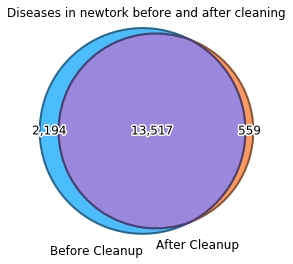

In [107]:
venn2_pretty([set(old_dis['id']), set(new_dis['id'])], ['Before Cleanup', 'After Cleanup'])
plt.title('Diseases in newtork before and after cleaning');

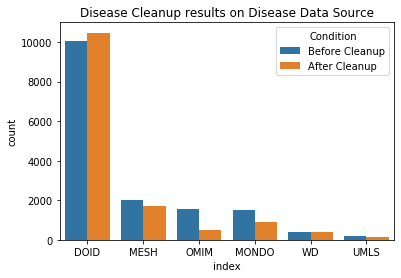

In [108]:
old_curi = old_dis['curi'].value_counts().rename('count').to_frame().reset_index()
new_curi = new_dis['curi'].value_counts().rename('count').to_frame().reset_index()

old_curi['Condition'] = 'Before Cleanup'
new_curi['Condition'] = 'After Cleanup'

sns.barplot(x='index', y='count', hue='Condition', data=pd.concat([old_curi, new_curi]))
plt.title('Disease Cleanup results on Disease Data Source');

In [109]:
dis_edges = combo.query('start_label == "Disease" or end_label == "Disease"')
old_dis_edges = old_combo.query('start_label == "Disease" or end_label == "Disease"')

In [110]:
dis_tup = set()
for row in dis_edges.itertuples():
    dis_tup.add((row.start_id, row.end_id, row.type))

In [111]:
old_dis_tup = set()
for row in old_dis_edges.itertuples():
    old_dis_tup.add((row.start_id, row.end_id, row.type))

In [112]:
len(dis_tup), len(old_dis_tup)

(2911566, 2827146)

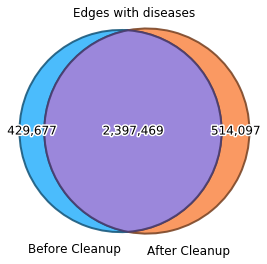

In [113]:
venn2_pretty([set(old_dis_tup), set(dis_tup)], ['Before Cleanup', 'After Cleanup'])
plt.title('Edges with diseases');